In [1]:
import data
import torch
from models import imagebind_model
from models.imagebind_model import ModalityType
import matplotlib.pyplot as plt
import numpy as np

device = "cuda:0" if torch.cuda.is_available() else "cpu"
# Initialize model
model = imagebind_model.imagebind_huge(pretrained=True)
model.to(device)

def get_imagebind_emb(input_type, file_path):

        # Load data
    if input_type == 1:
        mod = ModalityType.AUDIO

        inputs = {
            mod: data.load_and_transform_audio_data([file_path], device)
        }

    elif input_type == 2:
        mod = ModalityType.VISION
        inputs = {
            mod: data.load_and_transform_vision_data([file_path], device)
        }
        
    else:
        mod = ModalityType.TEXT
        inputs = {
            mod: data.load_and_transform_text(file_path, device)
        }


    with torch.no_grad():
        target_embedding = model(inputs)[mod]

    return target_embedding

/home/alberto/anaconda3/envs/imgbind/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/alberto/anaconda3/envs/imgbind/lib/python3.8/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/alberto/anaconda3/envs/imgbind/lib/python3.8/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(


In [2]:
# input_type = int(input('1 - audio\n2 - image\n3 - text'))
# file_path = input('File path/text prompt: ')
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data_path = 'exploration'
# data_path = '.assets'
# data_path = 'test_data'

files = []
points = []
colors = []

for file_path in [os.path.join(data_path, f) for f in os.listdir(data_path)]:

    if file_path.endswith('.wav'):
        input_type = 1
        # continue

    elif file_path.endswith('.png') or file_path.endswith('.jpg') or file_path.endswith('.jpeg'):
        input_type = 2
        continue

    elif file_path.endswith('.txt'):
        # continue
        input_type = 3
        with open(file_path, 'r') as file:
            file_path = file.read().replace('\n', '')

    else:
        raise Exception(f'File type {file_path.split(".")[-1]} not accepted.')

    emb = get_imagebind_emb(input_type, file_path)

    points.append(emb.cpu().numpy()[0])
    colors.append(input_type)
    files.append(file_path.split('/')[-1])

points = np.array(points)
colors = np.array(colors)

print(points.shape, colors.shape)

(11, 1024) (11,)


In [3]:
pca = TSNE(n_components=2, perplexity=5, init='pca', random_state=0)
# pca = PCA(n_components=2)
X = pca.fit_transform(points)
print(X.shape)

(11, 2)


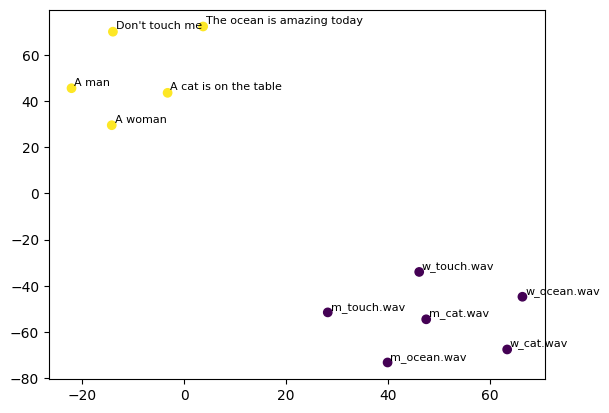

In [4]:

def plot_emb(X, colors, names):
    # plot data
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    for i, txt in enumerate(names):
        plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=8, xytext=(2, 2), textcoords='offset points')
        
    plt.show()

plot_emb(X, colors, files)